In [12]:
import os
dir_path = '/home/david/GIT/language-acquisition'
os.chdir(dir_path)

In [13]:
import matplotlib
# matplotlib.use("Qt5Agg") #Makes imshow work on mac
from matplotlib import pyplot as plt
from classes.mask_rcnn import MaskRCNN
#from Model import Model, draw_boxes
import cozmo
import queue
import time
import threading
import numpy as np
import os
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [14]:
print('where is vis util?',vis_util.__file__)

where is vis util? /home/david/anaconda3/envs/cozmo/lib/python3.7/site-packages/tensorflow/models/research/object_detection/utils/visualization_utils.py


In [15]:
obj_det_path = "/home/david/anaconda3/envs/cozmo/lib/python3.7/site-packages/tensorflow/models/research/object_detection/"

# faster_rcnn_inception_resnet_v2_atrous_oid_v4_2018_12_12'
MODEL_NAME = obj_det_path + 'd2s_model'

path = MODEL_NAME + '/frozen_inference_graph.pb'
image_dimensions = (240, 320, 3)
model = MaskRCNN(path, image_dimensions)

PATH_TO_LABELS = os.path.join(obj_det_path + 'd2s_model', 'label_map.pbtxt')

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [16]:
import datetime

def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

def detectImages():
    print('Detect Images started')
    while(True):
        if(not imageQueue.empty()):
            try:
                plt.clf() # We need to clear the plot so that we are not plotting every image each iteration. (If we don't we will get increasing delay)

                img = imageQueue.get()
                image_np = load_image_into_numpy_array(img)
                output_dict = model.detect(image_np)

                vis_util.visualize_boxes_and_labels_on_image_array(
                    image_np,
                    output_dict['detection_boxes'],
                    output_dict['detection_classes'],
                    output_dict['detection_scores'],
                    category_index,
#                     instance_masks=output_dict.get('detection_masks'),
                    use_normalized_coordinates=True,
                    min_score_thresh=.01,
                    line_thickness=8)

                plt.imshow(image_np)
                plt.pause(0.001) # imshow needs time to plot the image. Need this to display the image

                print('Do you want to save this image? (y for yes, s for skip):')
#             response = sys.stdin.readline()
                response = input()
                if response.strip() == 'y':
                    fileName = 'cozmo_pics/'
                    currentDT = datetime.datetime.now()
                    fileName += str(currentDT)
                    converted = img.convert()
                    converted.save(fileName, "JPEG", resolution=10)
                else:
                    continue
            
            except queue.Empty:
                pass

def handle_image(evt, obj=None, tap_count=None,  **kwargs):
    try:
        if(imageQueue.empty()):
            imageQueue.put_nowait(evt.image)
    except queue.Full:
        pass

def configure_camera(robot, exposure_amount, gain_amount):
    robot.camera.color_image_enabled = True
    # Lerp exposure between min and max times
    min_exposure = robot.camera.config.min_exposure_time_ms
    max_exposure = robot.camera.config.max_exposure_time_ms
    exposure_time = (1-exposure_amount)*min_exposure + exposure_amount*max_exposure
    # Lerp gain
    min_gain = robot.camera.config.min_gain
    max_gain = robot.camera.config.max_gain
    actual_gain = (1-gain_amount)*min_gain + gain_amount*max_gain
    robot.camera.set_manual_exposure(exposure_time, actual_gain)

def cozmo_program(robot: cozmo.robot.Robot):
    robot.set_lift_height(1.0)
    exposure_amount = 0.3 # Range: [0,1]
    gain_amount = 0.9 # Range: [0,1]
    configure_camera(robot, exposure_amount, gain_amount)
    robot.add_event_handler(cozmo.camera.EvtNewRawCameraImage, handle_image)
    print("Added event handler")
    while True:
        time.sleep(0.1)

In [17]:
%matplotlib inline

2019-10-14 15:47:25,319 cozmo.general INFO     App connection established. sdk_version=1.4.10 cozmoclad_version=3.4.0 app_build_version=00003.00004.00000
2019-10-14 15:47:25,319 cozmo.general INFO     App connection established. sdk_version=1.4.10 cozmoclad_version=3.4.0 app_build_version=00003.00004.00000
2019-10-14 15:47:25,321 cozmo.general INFO     Found robot id=1
2019-10-14 15:47:25,321 cozmo.general INFO     Found robot id=1
2019-10-14 15:47:25,325 cozmo.general INFO     Connected to Android device serial=03160355293b2004
2019-10-14 15:47:25,325 cozmo.general INFO     Connected to Android device serial=03160355293b2004


Detect Images started


2019-10-14 15:47:25,473 cozmo.general INFO     Robot id=1 serial=024086a7 initialized OK
2019-10-14 15:47:25,473 cozmo.general INFO     Robot id=1 serial=024086a7 initialized OK


Added event handler


Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/david/anaconda3/envs/cozmo/lib/python3.7/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "/home/david/anaconda3/envs/cozmo/lib/python3.7/tkinter/__init__.py", line 749, in callit
    func(*args)
  File "/home/david/anaconda3/envs/cozmo/lib/python3.7/site-packages/cozmo/tkview.py", line 164, in _repeat_draw_frame
    self._draw_frame()
  File "/home/david/anaconda3/envs/cozmo/lib/python3.7/site-packages/cozmo/tkview.py", line 158, in _draw_frame
    self.label.configure(image=photoImage)
  File "/home/david/anaconda3/envs/cozmo/lib/python3.7/tkinter/__init__.py", line 1485, in configure
    return self._configure('configure', cnf, kw)
  File "/home/david/anaconda3/envs/cozmo/lib/python3.7/tkinter/__init__.py", line 1476, in _configure
    self.tk.call(_flatten((self._w, cmd)) + self._options(cnf))
_tkinter.TclError: image "pyimage1" doesn't exist


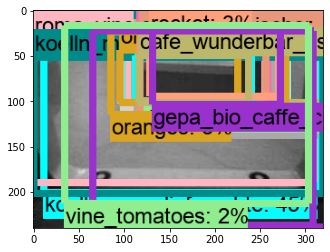

Do you want to save this image? (y for yes, s for skip):


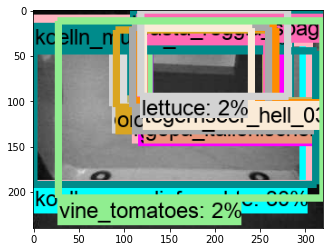

Do you want to save this image? (y for yes, s for skip):
s


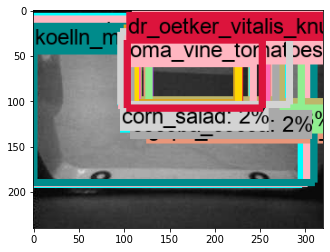

Do you want to save this image? (y for yes, s for skip):
s


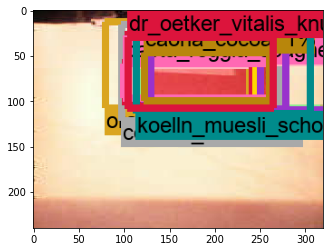

Do you want to save this image? (y for yes, s for skip):


2019-10-14 15:48:20,464 cozmo.general INFO     Shutting down connection
2019-10-14 15:48:20,464 cozmo.general INFO     Shutting down connection
2019-10-14 15:48:20,465 cozmo.general INFO     Android serial=03160355293b2004 disconnected.
2019-10-14 15:48:20,465 cozmo.general INFO     Android serial=03160355293b2004 disconnected.
2019-10-14 15:48:20,467 cozmo.general INFO     Exit requested by user
2019-10-14 15:48:20,467 cozmo.general INFO     Exit requested by user


In [19]:
#model = Model(path='../f18/data/coco2014', jpegs='../f18/train2014', bb_csv='../f18/data/coco2014/tmp/bb.csv')
imageQueue = queue.Queue(maxsize=1)

threading.Thread(target=detectImages).start()

cozmo.run_program(cozmo_program, use_viewer=True)